## 14. Ch5 준고전적 수송이론

### Transport
* Central problem of the computational electronics
  - Calculation of terminal currents
  - Example) Calculate the drain current, when $V_{GS}=V_{DS}=0.7V$.
* Quantum transport
  - Charge carriers(electrons and holes)
  - Most accurate method
* Semi-clasical transport
  - Treat charge carriers as semi-classical particles
  - Still, it can be useful to many cases.
### Governing equation
* Boltzmann transport equation
  - It reads
    $$\frac{\partial f}{\partial t}+\mathrm{v}\cdot\nabla_r f+\frac{1}{\hbar}\mathrm{F}\cdot\nabla_K f=\hat S $$
  - Time-evolution of $f$ is described.
  - Scattering can change $f$.
  - Motion of electrons
    - Non-zero velocity: change its spatial position
    - Acceleration: change its momentum
  - f: time-evolution of $f(\vec r, \vec p, t)$ is described, 공간, 운동량, 시간에 영향을 받는 분포 함수
  - 첫번째항, 시간에 따른 분포함수 f의 변화, 확산의 결과, 바람이 없는데도 안개가 점점 사라지거나 진해지는 것, 시간만으로 바뀌는 f
  - 두번째항, 안개 입자가 공간에서 움직일 때 생기는 변화, $\nabla_ r\cdot f$ 분포함수의 gradient, 농도 기울기, 확산을 일의키는 \
     원인, 메카니즘. 바람이 불어서 안개가 이리저리 퍼질 때 움직임, 움직임 때문에 바뀐 f. \
     속도라는 것은 안개 입자의 속도, 바람은 외력인가? \
     안개 예시에서의 바람이라는 것은 안개입자의 평균 속도이다. 따라서 바람은 외력이 아니다.\
     만약 바람에 의해서 안개의 속도가 변하면, 가속이 되면 외력으로 작용이 된다. \
  - 세번째항, 외부 힘 때문에 속도(운동량) 방향으로 분포가 어떻게 변하는지 나타내는 항.
  - 오른쪽항, 안개 입자의 충돌로 분포가 변하는 항.
  - 전체 분포함수의 시간에 따른 변화는 입자가 이동하면서 생기는 변화 + 외력에 의한 가속 + 충돌에 의한 변화, 이 세가지를 모두 모두 더한 결과
  - 두번째항과 세번째항 차이
    입자가 자기 속도로 입자가 공간에서 이동 -> 공간에서 분포 변화, 입자 자체가 이동함(공기 분자 움직임)\
    입자가 외력을 받아 가속됨 -> 속도 공간에서 분포 변화, 전기장에서의 전자 가속 \
    만약 바람의 속도가 변화(입자의 속도) -> 입자들이 외부힘을 받아 가속, 세번째항에 속함.\
    오른쪽항(충돌), 입자들끼의 충돌, 바람은 입자글의 평균 움직임, 독립된 존재로서의 입자와 충돌하는 것이 아니다.

### Force
* Electron force
  - it reads
    $$\mathrm{F}=-q\mathrm{E}=q\nabla \phi $$
* Under the magnetic field
  - Lorentz force can be considered.
  - (But it is not considered in this course.)
### python(1)
* Consider an one-dimentional system
  - electrons have the free electron mass, $m_0$.
  - since the magnitude of the electric field is $\mathrm{E}$, their(constant) acceleration is given by $-qE/m_0$.
### python(2)
* Setu up the initial distribution.
  - At the initial time, the position and the velocity of your several electrons are randomly determined.
### python(3)
* Time evolution
  - Set up the time interval and the number of steps.
### Results

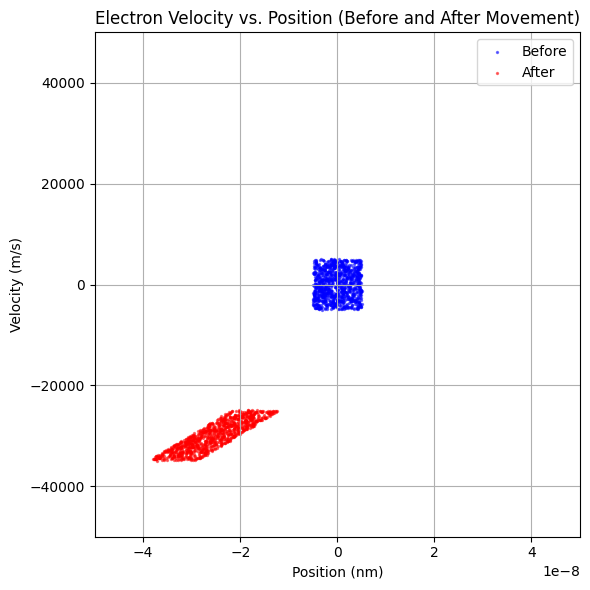

In [9]:
import numpy as np
import matplotlib.pyplot as plt

###########################################
#### change Electric field, time steps ####
###########################################

# Constants
E = 1e5  # Electric field in V/m
q = 1.602192e-19  # Elementary charge in C
m0 = 9.109534e-31  # Electron rest mass in kg
acceleration = -q * E / m0  # Acceleration in m/s^2

# Parameters
N = 1000  # Number of electrons
xmax = 10e-9  # Size of x range in meters
vmax = 1e4  # Size of v range in m/s
x_init = (np.random.rand(N) - 0.5) * xmax  # Initial positions
v_init = (np.random.rand(N) - 0.5) * vmax  # Initial velocities

# Copy for updates
x = x_init.copy()
v = v_init.copy()

# Time settings
dt = 1e-15  # Time interval per step in seconds
steps = 1700  # Number of time steps

# Time evolution
for _ in range(steps):
    x += v * dt
    v += acceleration * dt

# Plot before and after
plt.figure(figsize=(6, 6))

# Before
plt.scatter(x_init, v_init, s=2, c='blue', alpha=0.5, label='Before')
# After
plt.scatter(x, v, s=2, c='red', alpha=0.5, label='After')
plt.ylim(-5e4, 5e4), plt.xlim(-5e-8, 5e-8)
plt.xlabel("Position (nm)")
plt.ylabel("Velocity (m/s)")
plt.title("Electron Velocity vs. Position (Before and After Movement)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
